# Assignment Notebook

In [1]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math

%matplotlib inline

## Load the bankruptcy_helper module

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# Import bankruptcy_helper module
import bankruptcy_helper
%aimport bankruptcy_helper

helper = bankruptcy_helper.Helper()

# Recipe Step A: Get the data

## Frame the problem

We want to predict whether a company will go bankrupt in the following year, based on financial attributes of the company.

To predict this, we gather many companies' financial attributes and their bankrupt information.

## A.1 Get the data

In [2]:
# Data directory
DATA_DIR = "./Data"

if not os.path.isdir(DATA_DIR):
    DATA_DIR = "../resource/asnlib/publicdata/bankruptcy/data"

data_file = "5th_yr.csv"
data = pd.read_csv( os.path.join(DATA_DIR, "train", data_file) )

target_attr = "Bankrupt"

n_samples, n_attrs = data.shape
print("Date shape: ", data.shape)

Date shape:  (4818, 66)


## A.2 Have a look at the data

In [3]:
data
data.info()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.41769,0.0568,1.1605,-126.39,0.41355,0.025417,1.2395,1.16500,0.51773,...,0.049094,0.85835,0.12322,5.6167,7.4042,164.3100,2.2214,1.334,0,4510
1,-0.023834,0.2101,0.50839,4.2374,22.034,0.058412,-0.027621,3.6579,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.4460,13.802,6.4782,0,3537
2,0.030515,0.44606,0.19569,1.565,35.766,0.28196,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.25266,15.049,2.8179,104.7300,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.68,438.2,0.13649,0.058164,10.853,1.02790,0.61173,...,0.085524,0.97282,0,6.0157,7.4626,48.7560,7.4863,1.0602,0,1806
4,0.000992,0.49712,0.12316,1.3036,-71.398,0,0.001007,1.0116,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.582,114.5800,3.1854,2.742,0,1529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813,0.21199,0.20585,0.1417,1.7941,72.981,0,0.26531,3.8579,0.98420,0.79415,...,0.26694,0.73275,0.022101,?,3.5081,66.1710,5.516,1.4476,0,1985
4814,0.3119,0.09958,0.57936,10.679,245.98,0,0.31317,9.0422,1.05160,0.90042,...,0.3464,0.70705,0.044114,14.018,7.0618,20.7760,17.568,2.9149,0,3963
4815,-0.029746,0.44898,0.39136,1.9388,7.8073,-0.020006,-0.030561,1.2259,1.00010,0.5504,...,-0.054046,0.99986,0.058336,15.547,8.7022,34.3700,10.62,23.086,0,4167
4816,0.28473,0.079573,0.46261,6.8137,-81.158,-0.79551,0.28473,11.567,6.07180,0.92043,...,0.30935,0.19889,0,?,28.5,4.7834,76.305,13.263,0,1579


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4818 non-null   object 
 1   X2        4818 non-null   object 
 2   X3        4818 non-null   object 
 3   X4        4818 non-null   object 
 4   X5        4818 non-null   object 
 5   X6        4818 non-null   object 
 6   X7        4818 non-null   object 
 7   X8        4818 non-null   object 
 8   X9        4818 non-null   float64
 9   X10       4818 non-null   object 
 10  X11       4818 non-null   object 
 11  X12       4818 non-null   object 
 12  X13       4818 non-null   float64
 13  X14       4818 non-null   object 
 14  X15       4818 non-null   object 
 15  X16       4818 non-null   object 
 16  X17       4818 non-null   object 
 17  X18       4818 non-null   object 
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4818 non-null   obje

Most data types are object, need to turn them to number.

In [4]:
data=data.apply(pd.to_numeric, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4816 non-null   float64
 1   X2        4816 non-null   float64
 2   X3        4816 non-null   float64
 3   X4        4803 non-null   float64
 4   X5        4808 non-null   float64
 5   X6        4816 non-null   float64
 6   X7        4816 non-null   float64
 7   X8        4804 non-null   float64
 8   X9        4818 non-null   float64
 9   X10       4816 non-null   float64
 10  X11       4816 non-null   float64
 11  X12       4803 non-null   float64
 12  X13       4818 non-null   float64
 13  X14       4816 non-null   float64
 14  X15       4812 non-null   float64
 15  X16       4804 non-null   float64
 16  X17       4804 non-null   float64
 17  X18       4816 non-null   float64
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4744 non-null   floa

After turning the type, we can have a look at the describtion of the data.

In [5]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
count,4816.000000,4816.000000,4816.000000,4803.000000,4.808000e+03,4816.000000,4816.000000,4804.000000,4818.000000,4816.000000,...,4816.000000,4818.000000,4816.000000,4.598000e+03,4806.000000,4818.000000,4803.000000,4735.000000,4818.000000,4818.000000
mean,-0.055232,0.533272,0.188992,4.978602,1.956441e+01,-0.070060,-0.042516,5.739985,1.579277,0.503606,...,0.022793,0.959585,0.273025,1.108795e+03,11.021303,177.494445,9.287631,38.557533,0.063927,3499.858032
std,6.707351,1.202909,1.282430,100.273952,2.384491e+04,7.778523,6.707970,109.508001,1.342723,4.044036,...,7.249022,0.932427,6.338601,7.106563e+04,43.821146,2279.713700,113.225922,588.711967,0.244648,1392.049260
min,-463.890000,0.000000,-72.067000,0.000000,-1.076400e+06,-463.890000,-463.890000,-3.735100,0.000191,-71.444000,...,-468.670000,-0.085920,-184.980000,-1.244000e+01,-0.092493,0.000000,0.000000,-3.726500,0.000000,1071.000000
25%,0.004047,0.254670,0.044923,1.099200,-4.312000e+01,0.000000,0.005985,0.481588,1.015600,0.318990,...,0.015574,0.876940,0.000000,5.298300e+00,4.229925,45.065750,3.074350,2.114850,0.000000,2296.250000
50%,0.046487,0.451495,0.218560,1.642300,3.673450e-01,0.000000,0.056685,1.149000,1.140500,0.522325,...,0.108940,0.950825,0.006320,9.038900e+00,6.176800,73.879500,4.928700,4.077200,0.000000,3500.500000
75%,0.116730,0.662178,0.420153,2.929200,4.986775e+01,0.110470,0.136025,2.781300,1.814050,0.721823,...,0.240262,0.990358,0.206915,1.720750e+01,9.302800,118.597500,8.067850,9.187600,0.000000,4704.750000
max,2.352300,72.416000,28.336000,6845.800000,1.250100e+06,203.150000,2.352300,6868.500000,37.807000,266.860000,...,87.981000,47.788000,308.150000,4.818700e+06,1308.500000,127450.000000,7641.300000,28999.000000,1.000000,5909.000000


### The meaning of each attribute

From the above, we get the information
- There are 4818 examples, 64 features.
- Most features have some missing values.
- There are about 308 examples of bankrupt, and 4510 examples of nonbankrupt. The data is significantly imbalanced.

## A.3 Define the performance measure

Since the imbalance of the data, we use combination of precision and recall to measure the performance as well.

## A.4 Set the test set

Set 90% of examples to be train data, 10% to be test data.

Random state set to be 42.

In [6]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=['Bankrupt','Id'])
y=data['Bankrupt']
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.10, random_state=42)

X_train.shape, X_test.shape
y_train.shape, y_test.shape

((4336, 64), (482, 64))

((4336,), (482,))

# Recipe Step B: Exploratory Data Analysis (EDA)

## Visualization

Firstly, the number of features is large and there are some features correlated to each other. Having a glance at the correlation might be helpful for understanding the relationships among features.

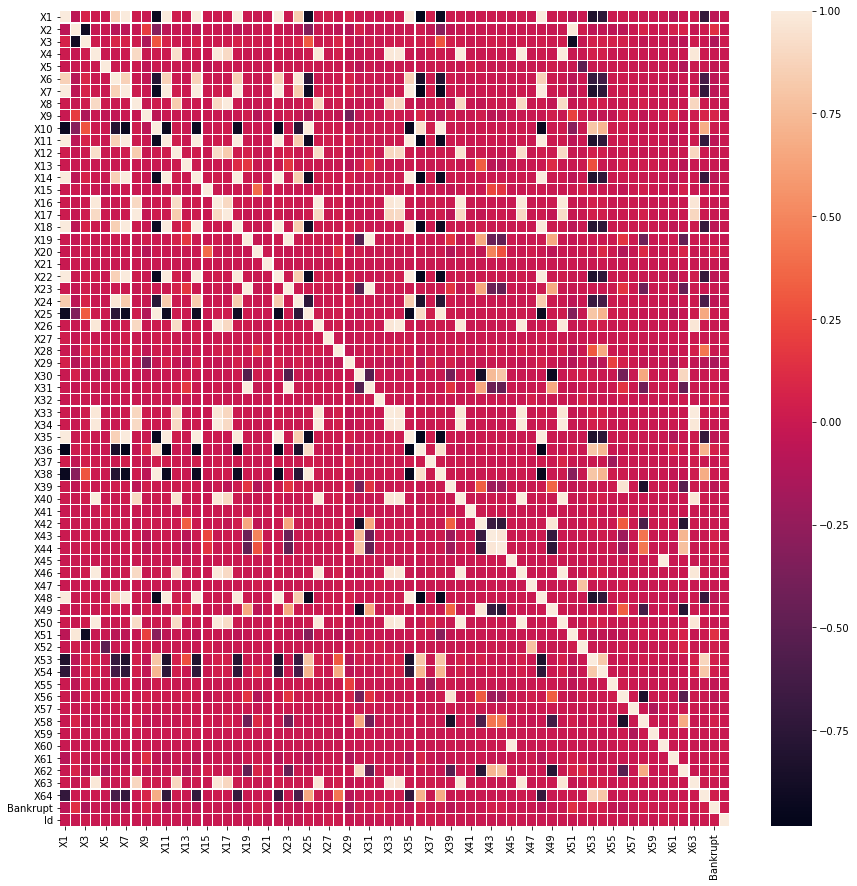

In [7]:
import seaborn as sns
correlation=data.corr()
f, ax=plt.subplots(figsize=(15,15))
sns.heatmap(correlation,ax=ax,linewidths=0.1)

# Recipe Step C: Prepare the data

## C1: Data Cleaning

- There exists many ? in the data which need to be cleaned or relapced.
- Drop X37 beacause of large number of missing values

## C2: Handling non-numeric features/targets

- Transfer the object features to numerical features.

## C3: Transformations

- Missing values are imputed from median of the remaining companies.
- Use class weight in sklearn to deal with imbalanced data 
- Need to decrease the dimension of features, and construct a new principal features vector.

## C4: Scaling

- If our model is sensitive to scaling of the data, need to scale our data


In [8]:
from sklearn.decomposition import PCA
from sklearn import pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

In [9]:
#Delete X37 because of large number of missing values
del X_train['X37']

### PCA Analysis

Pipeline(steps=[('median_imputation', SimpleImputer(strategy='median')),
                ('Dimension_Reduction', PCA(n_components=60)),
                ('scaler', StandardScaler())])

Text(0.5, 0, 'number of components')

Text(0, 0.5, 'cumulative explained variance')

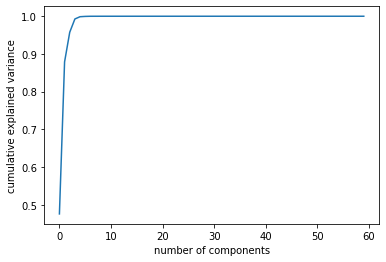

In [10]:
# Transformation of Imputation and PCA
imputed_features=SimpleImputer(strategy='median')
pca=PCA(n_components=60)
scaler=StandardScaler()
preprocess_pipeline=pipeline.Pipeline([('median_imputation',imputed_features),
                             ('Dimension_Reduction', pca),
                                       ('scaler',scaler)])
preprocess_pipeline.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

It seems that if we want to achieve 99% of variance to be explained, the numebr of components should be around 5.

Pipeline(steps=[('median_imputation', SimpleImputer(strategy='median')),
                ('Dimension_Reduction', PCA(n_components=5)),
                ('scaler', StandardScaler())])

Text(0.5, 0, 'number of components')

Text(0, 0.5, 'cumulative explained variance')

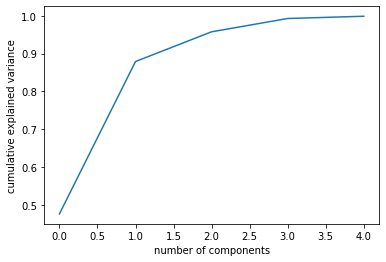

In [11]:
imputed_features=SimpleImputer(strategy='median')
pca=PCA(n_components=5)
preprocess_pipeline=pipeline.Pipeline([('median_imputation',imputed_features),
                             ('Dimension_Reduction', pca),
                                       ('scaler',scaler)])
preprocess_pipeline.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

# Recipe Step D: Modeling

## Use SVM, Logistic Regression and Random Forest to fit

- Perform all the transformations mentioned in the previous section.
- For random forest classifier, choose number of trees to be 200, max depth to be 3 to create an ensemble of weak learners.

### Trade off between Recall and Precision for random forest
- For random forest, I adjusted n_estimators and max_depth to reduce overfitting and make recall bigger than precision, also keep a decent overall accuracy score at the same time.

In [12]:
from sklearn import svm
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, precision_recall_curve
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

Text(0.5, 1.0, 'Logistic')

Model: Logistic avg cross val score=0.54

Model: Logistic score in sample=0.54

Model: Logistic recall in sample=0.85

Model: Logistic precision in sample=0.11

Model: Logistic
[[2104 1957]
 [  40  235]]


Text(0.5, 1.0, 'SVM')

Model: SVM avg cross val score=0.65

Model: SVM score in sample=0.67

Model: SVM recall in sample=0.74

Model: SVM precision in sample=0.13

Model: SVM
[[2681 1380]
 [  72  203]]


Text(0.5, 1.0, 'Random Forest')

Model: Random Forest avg cross val score=0.80

Model: Random Forest score in sample=0.80

Model: Random Forest recall in sample=0.74

Model: Random Forest precision in sample=0.21

Model: Random Forest
[[3284  777]
 [  72  203]]


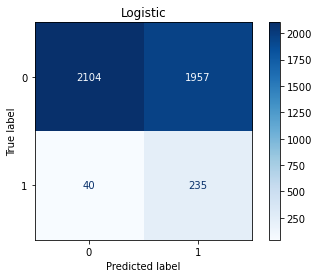

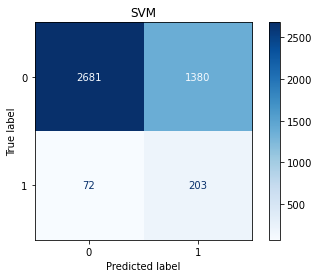

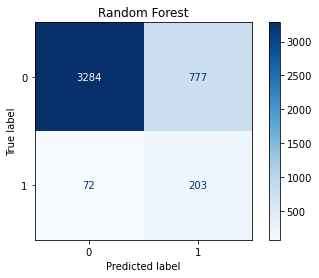

In [13]:
svm_clf=svm.SVC(class_weight="balanced")
logistic_clf = linear_model.LogisticRegression(class_weight='balanced',solver='liblinear')
forest_clf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=42,class_weight='balanced')

for name, clf in { "Logistic": logistic_clf,
                   "SVM": svm_clf,
                   "Random Forest": forest_clf
                 }.items():
    imputed_features=SimpleImputer(strategy='median')
    pca=PCA(n_components=5)
    scaler=StandardScaler()
    preprocess_pipeline=pipeline.Pipeline([('median_imputation',imputed_features),
                             ('Dimension_Reduction', pca),
                                       ('scaler',scaler)])
    pipe=pipeline.Pipeline([('Preprocess',preprocess_pipeline),
                       ('clf',clf)])
    _= pipe.fit(X_train, y_train)
    
    scores = cross_val_score(pipe,X_train, y_train, cv=10)
    accuracy_test = accuracy_score(y_train, pipe.predict(X_train))
    recall_test = recall_score(y_train, pipe.predict(X_train), pos_label=1, average="binary")
    precision_test = precision_score(y_train, pipe.predict(X_train), pos_label=1, average="binary")
    disp=plot_confusion_matrix(clf, preprocess_pipeline.transform(X_train), y_train,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(name)
    print("Model: {m:s} avg cross val score={s:3.2f}\n".format(m=name, s=scores.mean()) ,
         "Model: {m:s} score in sample={c:3.2f}\n".format(m=name,c=accuracy_test),
         "Model: {m:s} recall in sample={r:3.2f}\n".format(m=name,r=recall_test),
         "Model: {m:s} precision in sample={p:3.2f}\n".format(m=name,p=precision_test),
         sep='\n')
    print("Model: {m:s}".format(m=name))
    print(disp.confusion_matrix)
    


## Out of sample socres
Let's try the test set for each model.

In [14]:
def MyModel_forest(X):
    # It should create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    
    # YOUR CODE GOES HERE
    
    #Transfer the data type to numerics
    X=X.apply(pd.to_numeric, errors='coerce')
    #Delete X37 because of large number of missing values
    X=X.drop(columns=['X37'])
    # Transformation of Imputation and PCA
    imputed_features=SimpleImputer(strategy='median')
    pca=PCA(n_components=5)
    scaler=StandardScaler()
    forest_clf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=42,class_weight='balanced')
    preprocess_pipeline=pipeline.Pipeline([('median_imputation',imputed_features),
                             ('Dimension_Reduction', pca),
                                       ('scaler',scaler)])
    pipe=pipeline.Pipeline([('Preprocess',preprocess_pipeline),
                       ('clf',forest_clf)])
    _=pipe.fit(X_train, y_train)
    predictions=pipe.predict(X)
    
    return predictions

name = "Random Forest Model"
y_test_pred = MyModel_forest(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred, pos_label=1, average="binary")
precision_test = precision_score(y_test,   y_test_pred, pos_label=1, average="binary")

print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )
confusion_matrix(y_test,y_test_pred)

	Random Forest Model Accuracy: 80.1%, Recall 63.6%, Precision 20.0%


array([[365,  84],
       [ 12,  21]])

In [15]:
def MyModel_svm(X):
    # It should create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    
    # YOUR CODE GOES HERE
    
    #Transfer the data type to numerics
    X=X.apply(pd.to_numeric, errors='coerce')
    #Delete X37 because of large number of missing values
    X=X.drop(columns=['X37'])
    # Transformation of Imputation and PCA
    imputed_features=SimpleImputer(strategy='median')
    pca=PCA(n_components=5)
    scaler=StandardScaler()
    svm_clf=svm.SVC(class_weight="balanced")
    preprocess_pipeline=pipeline.Pipeline([('median_imputation',imputed_features),
                             ('Dimension_Reduction', pca),
                                       ('scaler',scaler)])
    pipe=pipeline.Pipeline([('Preprocess',preprocess_pipeline),
                       ('clf',svm_clf)])
    _=pipe.fit(X_train, y_train)
    predictions=pipe.predict(X)
    
    return predictions

name = "SVM"
y_test_pred = MyModel_svm(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred, pos_label=1, average="binary")
precision_test = precision_score(y_test,   y_test_pred, pos_label=1, average="binary")

print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )
confusion_matrix(y_test,y_test_pred)

	SVM Accuracy: 62.9%, Recall 60.6%, Precision 10.8%


array([[283, 166],
       [ 13,  20]])

In [16]:
def MyModel_logistic(X):
    # It should create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    
    # YOUR CODE GOES HERE
    
    #Transfer the data type to numerics
    X=X.apply(pd.to_numeric, errors='coerce')
    #Delete X37 because of large number of missing values
    X=X.drop(columns=['X37'])
    # Transformation of Imputation and PCA
    imputed_features=SimpleImputer(strategy='median')
    pca=PCA(n_components=5)
    scaler=StandardScaler()
    logistic_clf = linear_model.LogisticRegression(class_weight='balanced',solver='liblinear')
    preprocess_pipeline=pipeline.Pipeline([('median_imputation',imputed_features),
                             ('Dimension_Reduction', pca),
                                       ('scaler',scaler)])
    pipe=pipeline.Pipeline([('Preprocess',preprocess_pipeline),
                       ('clf',logistic_clf)])
    _=pipe.fit(X_train, y_train)
    predictions=pipe.predict(X)
    
    return predictions

name = "Logistic"
y_test_pred = MyModel_logistic(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred, pos_label=1, average="binary")
precision_test = precision_score(y_test,   y_test_pred, pos_label=1, average="binary")

print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )
confusion_matrix(y_test,y_test_pred)

	Logistic Accuracy: 51.7%, Recall 81.8%, Precision 10.6%


array([[222, 227],
       [  6,  27]])

- Among three models, Random forest performs best overall speaking. In sample accuracy socre is the highest and the recall is good as well. It also satisfies that our assumption of it is 5 times worse to fail to identify a company that will go bankrupt than it is to fail to identify a company that won't go bankrupt, which implies Recall should be about 5 times larger than the Precision.
- Still want to have a look at if there're other trade-off can be performanced on the other two model.
- Tried on SVM and it didn't work. The result made no sense.
- Try on the simple model Logistic Regression.

### Trade off between recall and precision of Logistic Regression through changing threshhold


Text(0.5, 1.0, 'Precision-Recall vs Threshold Chart')

Text(0, 0.5, 'Precision, Recall')

Text(0.5, 0, 'Threshold')

(0.0, 1.0)

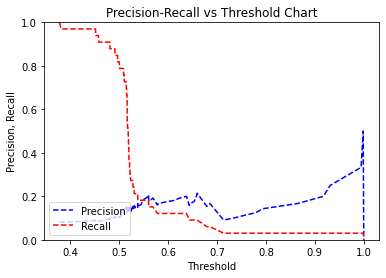

In [17]:
def MyModel_logistic(X):
    # It should create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    
    # YOUR CODE GOES HERE
    
    #Transfer the data type to numerics
    X=X.apply(pd.to_numeric, errors='coerce')
    #Delete X37 because of large number of missing values
    X=X.drop(columns=['X37'])
    # Transformation of Imputation and PCA
    imputed_features=SimpleImputer(strategy='median')
    pca=PCA(n_components=5)
    scaler=StandardScaler()
    logistic_clf = linear_model.LogisticRegression(class_weight='balanced',solver='liblinear')
    preprocess_pipeline=pipeline.Pipeline([('median_imputation',imputed_features),
                             ('Dimension_Reduction', pca),
                                       ('scaler',scaler)])
    pipe=pipeline.Pipeline([('Preprocess',preprocess_pipeline),
                       ('clf',logistic_clf)])
    _=pipe.fit(X_train, y_train)
    predictions=pipe.predict_proba(X)
    
    return predictions

name = "Logistic"
y_test_pred = MyModel_logistic(X_test)[:,1] 
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred) 


plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [18]:
logistic_clf = linear_model.LogisticRegression(class_weight='balanced',solver='liblinear')
imputed_features=SimpleImputer(strategy='median')
pca=PCA(n_components=5)
scaler=StandardScaler()
preprocess_pipeline=pipeline.Pipeline([('median_imputation',imputed_features),
                             ('Dimension_Reduction', pca),
                                       ('scaler',scaler)])
pipe=pipeline.Pipeline([('Preprocess',preprocess_pipeline),
                       ('clf',logistic_clf)])
_=pipe.fit(X_train, y_train)
#Adjust the threshold
y_test_pred=np.where(pipe.predict_proba(X_test.drop(columns=['X37']))[:,1]>=0.517,1,0)

accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred, pos_label=1, average="binary")
precision_test = precision_score(y_test,   y_test_pred, pos_label=1, average="binary")

print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )
confusion_matrix(y_test,y_test_pred)

	Logistic Accuracy: 72.4%, Recall 54.5%, Precision 13.2%


array([[331, 118],
       [ 15,  18]])

- Adjusted the threshold according to the Precision and Recall Plot, achieved higher out of sample accuracy score but decrese the recall.
- Logistic Regression still underperform the Random Forest.
- Choose Random Forest to be the final model used to predict bankruptcy.

## Error Analysis

- Using other methods of dealing with imbalanced data, such as SMOTE might achieve a better performance.
- Maybe a more sophisticated feature engineering process, such as dealing with missing value by random forest can increase the overall accuracy score and a better recall precision.

# Final Model

In [19]:
def MyModel(X):
    # It should create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    
    # YOUR CODE GOES HERE
    
    #Transfer the data type to numerics
    X=X.apply(pd.to_numeric, errors='coerce')
    #Delete X37 because of large number of missing values
    X=X.drop(columns=['X37'])
    #Preparation
    imputed_features=SimpleImputer(strategy='median')
    pca=PCA(n_components=5)
    scaler=StandardScaler()
    forest_clf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=42,class_weight='balanced')
    #Transformation and model pipeline
    preprocess_pipeline=pipeline.Pipeline([('median_imputation',imputed_features),
                             ('Dimension_Reduction', pca),
                                       ('scaler',scaler)])
    pipe=pipeline.Pipeline([('Preprocess',preprocess_pipeline),
                       ('clf',forest_clf)])
    #Fit
    _=pipe.fit(X_train, y_train)
    #Predict
    predictions=pipe.predict(X)
    
    return predictions

In [20]:
name = "Random Forest Calssifier for Bankruptcy"
y_test_pred = MyModel(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred, pos_label=1, average="binary")
precision_test = precision_score(y_test,   y_test_pred, pos_label=1, average="binary")

print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )

	Random Forest Calssifier for Bankruptcy Accuracy: 80.1%, Recall 63.6%, Precision 20.0%
